# Reading in CSV

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

listings_file = "listings.csv"
# Read in dataframe
listings_df = pd.read_csv(listings_file)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,11/4/2019,0.34,3,308
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,79,1,403,5/4/2021,5.16,1,208
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,6/5/2016,0.56,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,21,1,1/2/2014,0.01,1,134
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,61,2,474,9/25/2020,3.61,1,246


Certain air bnbs in the csv file have prices listed as 0 
This makes no sense so we are removing these values

In [2]:
listings_df = listings_df.loc[listings_df["price"]!=0]

# Pie Chart: Number of Borough Listings

In [3]:
# Here I want to get a list of the group neighbourhoods
large_neighborhoods_list = listings_df["neighbourhood_group"].unique()
total_listings = len(listings_df)

In [4]:
# Now that I have a list of the group neighbourhoods I am going to find the percentage of listings for each
neighborhood_counts = listings_df["neighbourhood_group"].value_counts()
neighborhood_df = pd.DataFrame({"Total Listings": neighborhood_counts,
                                "Percentage of listings": ((neighborhood_counts/total_listings)*100).map("{:.2f}%".format)})
neighborhood_df

,Total Listings,Percentage of listings
Manhattan,15872,43.85%
Brooklyn,14234,39.33%
Queens,4785,13.22%
Bronx,1002,2.77%
Staten Island,299,0.83%


In [5]:
# Extract neighborhood names and Total Listing numbers per borough from dataframe
group_names = neighborhood_df.index
total_n_listings =[]
for x in range(len(neighborhood_df)):
    total_n_listings.append(neighborhood_df["Total Listings"][x])

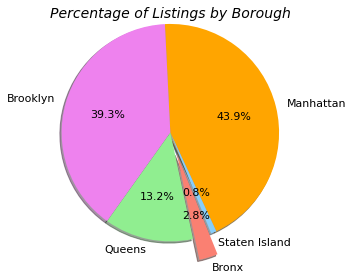

In [6]:
# Create a pie chart for the listing percentages per neighborhood 
labels = group_names
explode = (0, 0, 0, 0.25, 0)

colors = ["orange", "violet", "lightgreen", "salmon","lightskyblue"]
plt.pie(total_n_listings, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=295, colors=colors, radius =1.25, textprops={'fontsize': 11}, pctdistance=0.6)
plt.title("Percentage of Listings by Borough",fontsize=14, fontstyle="oblique")
plt.savefig("Graphs/Borough_pie_chart.png")

plt.show()

# Bar Chart: Borough Avg Listing Price

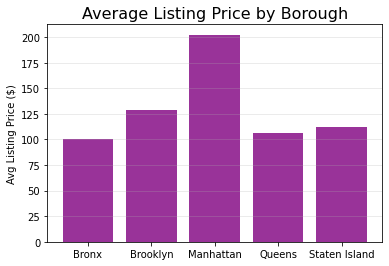

In [7]:
# Here I want to find the avg listing price per borough
borough_group_df = listings_df.groupby(["neighbourhood_group"])
avg_borough_price = borough_group_df["price"].mean()
borough_names = avg_borough_price.index

total_b_listings = []
for x in range(len(borough_names)):
    total_b_listings.append(avg_borough_price[x])
    
x_axis = np.arange(len(borough_names))

plt.bar(x_axis, avg_borough_price, color='purple', alpha=0.8, align="center")
plt.xticks(x_axis, borough_names, rotation='0')

plt.title("Average Listing Price by Borough", fontsize=16)
plt.ylabel("Avg Listing Price ($)")
plt.grid(axis='y', alpha = 0.3)

plt.savefig("Graphs/Boroughs_avgprice_bar_chart.png")

plt.show()

# Scatterplot: Neighborhood Avg Price vs Number of Listings

In [8]:
# Find the number of neighborhoods in the dataframe
neighborhoods_list = listings_df["neighbourhood"].unique()
print(f"There are {len(neighborhoods_list)} neighborhoods in the csv file")

There are 221 neighborhoods in the csv file


In [9]:
# Calculate the average listing price per neighborhood and the number of listings per neighborhood
neighborhood_grouped_df = listings_df.groupby(["neighbourhood"])
avg_neigh_price = neighborhood_grouped_df["price"].mean()
count_list_neigh = neighborhood_grouped_df["neighbourhood"].count()

# Create a dataframe to store the avg price and number of listings per neighborhood
neighborhoods_df = pd.DataFrame(avg_neigh_price)
neighborhoods_df["Num of Listings"] = count_list_neigh

The correlation coefficient is 0.1


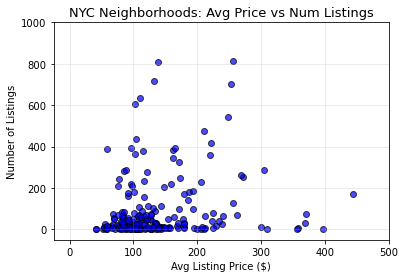

In [10]:
plt.scatter(neighborhoods_df["price"], neighborhoods_df["Num of Listings"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)

plt.title("NYC Neighborhoods: Avg Price vs Num Listings", fontsize=13)
plt.ylabel("Number of Listings")
plt.xlabel("Avg Listing Price ($)")
plt.xlim(-25, 500)
plt.ylim(-50, 1000)
plt.grid(True, alpha = 0.3)

correlation = st.pearsonr(neighborhoods_df["price"], neighborhoods_df["Num of Listings"])
print(f"The correlation coefficient is {round(correlation[0],2)}")

plt.savefig("Graphs/Neighborhoods_AvgPrice_vs_NumListings_scatter.png")

plt.show()